##### Using `K-Means` to cluster data <br>
##### `K-Means` minimizes the within-cluster sum of squared distance from the mean, following two steps: 
##### 1. First, with specifed number of clusters, `K`, assign each datapoint to the nearest cluster
##### 2. Second, update each centroid by calculating the mean of each point assigned to this cluster.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.datasets import make_blobs 
blobs, classes = make_blobs(500, centers=3)

Text(0.5, 1.0, 'Blobs')

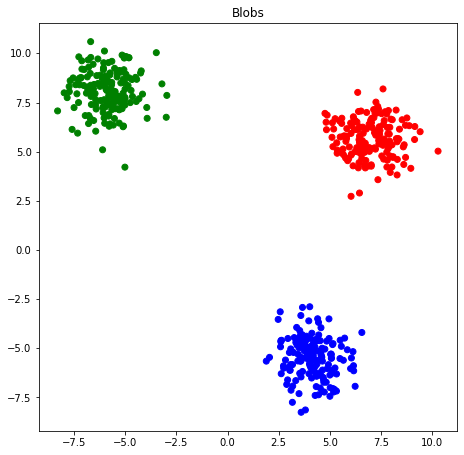

In [2]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
rgb = np.array(['r','g','b'])
ax.scatter(blobs[:,0],blobs[:,1],color=rgb[classes])
ax.set_title("Blobs")

In [9]:
#Lets assume we are looking for three centers 

from sklearn.cluster import KMeans 
kmean = KMeans(n_clusters=3)

kmean.fit(blobs)
kmean.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [4]:
kmean.cluster_centers_

array([[ 4.14462831, -5.48982582],
       [-5.85127158,  8.07578743],
       [ 6.94642657,  5.66882841]])

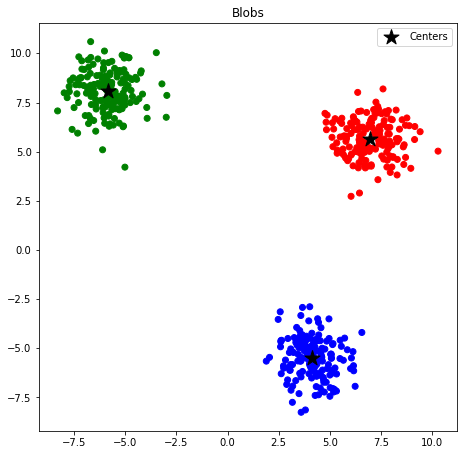

In [5]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.scatter(blobs[:,0],blobs[:,1],color=rgb[classes])
ax.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],marker='*',s = 250, color='black',label='Centers')
ax.set_title("Blobs")
ax.legend(loc='best')

In [6]:
#Checking labels and classes
print(kmean.labels_[:15])
print(classes[:15])

[0 0 2 2 1 1 1 2 2 1 2 1 2 1 0]
[2 2 0 0 1 1 1 0 0 1 0 1 0 1 2]


In [7]:
#Transform provides information on the distance between each point and the centroid
kmean.transform(blobs)[:5]

array([[ 2.09407777, 15.67517132, 12.15981606],
       [ 0.33286903, 16.64821198, 11.172294  ],
       [10.37615495, 13.08572665,  1.13221359],
       [11.78914527, 12.20633327,  0.8741677 ],
       [17.27342423,  0.44963345, 13.4376887 ]])

#### Optimizing the number of centroids

##### `Silhouette Distance` - It is the ration of the difference between the in-cluster dissimilarity, and the closest out-of-cluster dissimilarity, and the maximum of these two values

In [10]:
import numpy as np
from sklearn import metrics 
silhouette_samples = metrics.silhouette_samples(blobs, kmean.labels_)
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[2.        , 0.80690255],
       [2.        , 0.89124989],
       [0.        , 0.84206206],
       [0.        , 0.87442509],
       [1.        , 0.9008225 ]])

<AxesSubplot:>

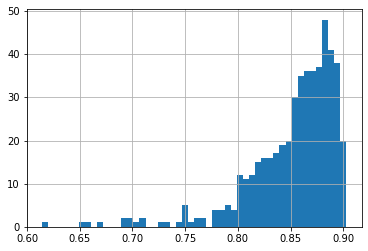

In [11]:
pd.Series(silhouette_samples).hist(bins=50)

###### Having higher number of coefficients close to 1 is good - it will be improving score

In [12]:
#Checking the average of the silhouette coefficients used to describe the entire models'fit 

silhouette_samples.mean()

0.8527675050836363

In [13]:
#Digging deeper 

metrics.silhouette_score(blobs, kmean.labels_)

0.8527675050836363

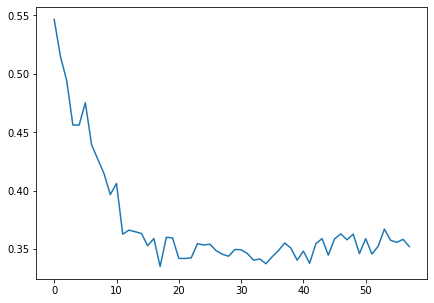

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline 

blobs, classes = make_blobs(500, centers = 10)
silhouette_avg = []
for k in range(2,60):
    kmean = KMeans(n_clusters=k).fit(blobs)
    silhouette_avg.append(metrics.silhouette_score(blobs, kmean.labels_))

f, ax = plt.subplots(figsize=(7,5))
ax.plot(silhouette_avg)